<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


#### Importing Necessary Libraries for Visualization

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

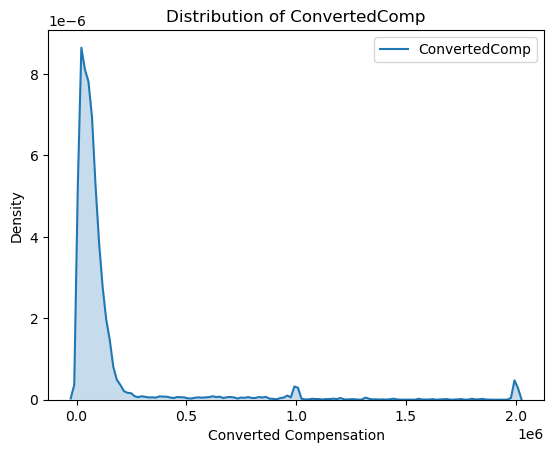

In [4]:
# Plots the distribution curve for Converted Camp
sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


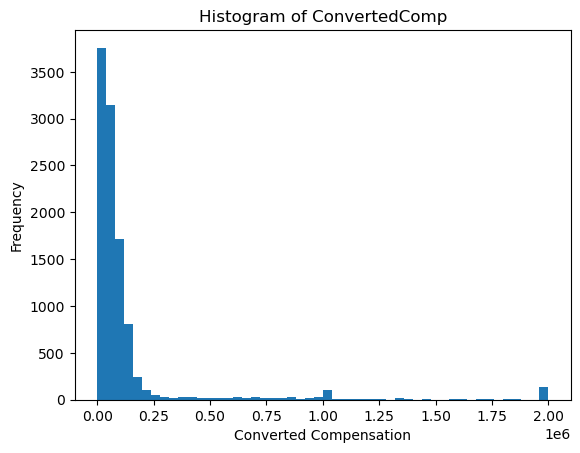

In [7]:
# Plots the histogram for ConvertedComp
plt.hist(df['ConvertedComp'].dropna(), bins=50)
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.show()



What is the median of the column `ConvertedComp`?


In [8]:
# Creates object that displays median of ConvertedComp
median_converted_comp = df['ConvertedComp'].median()
print(f"The median of ConvertedComp is: {median_converted_comp}")


The median of ConvertedComp is: 57745.0


In [34]:
# Creates object that displays median of column 'Age'
median_Age = df['Age'].median()
print(f"The median of Age is: {median_Age}")


The median of Age is: 29.0


How many responders identified themselves only as a **Man**?


In [9]:
# Creates object that displays the number of responders who identified themselves as a Man
count_man = df[df['Gender'] == 'Man'].shape[0]
print(f"Number of responders identified themselves only as a Man: {count_man}")


Number of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# Creats object that displays the median of responders who identified themselves as a Woman
median_converted_comp_women = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median ConvertedComp of responders identified themselves only as a Woman: {median_converted_comp_women}")



The median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# Generates a five number summary for the column age
age_five_number_summary = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]
print(age_five_number_summary)

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


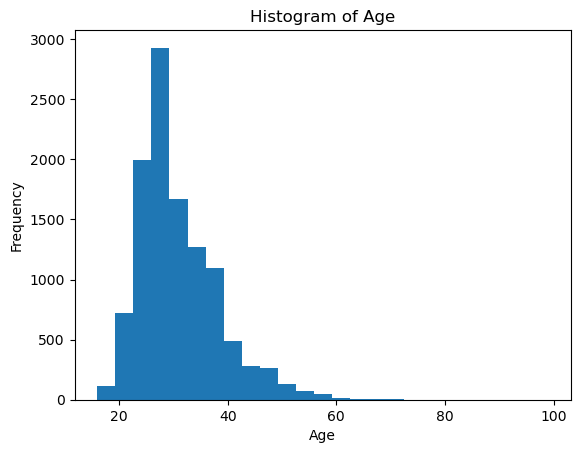

In [12]:
# Plots a histogram of the column 'Age'
plt.hist(df['Age'].dropna(), bins=25)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


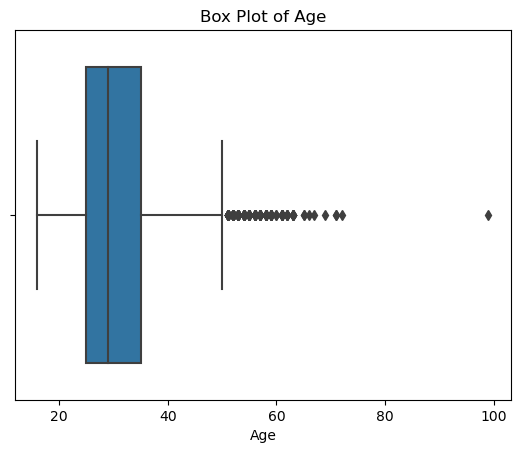

In [36]:
# Creates a boxplot to visualize outliers in the column 'Age'
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


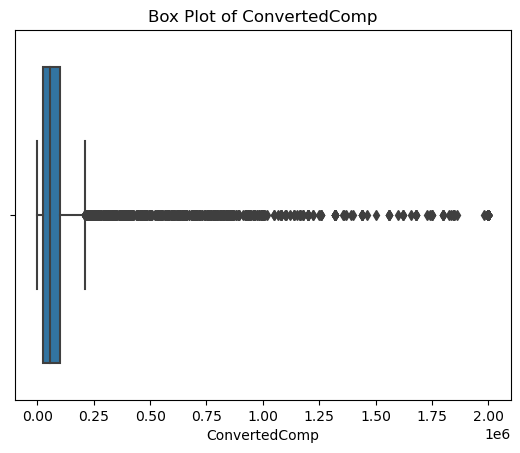

In [21]:
# Creates a boxplot to visualize outliers in the column 'ConvertedComp'
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# Calculates the Inter Quartile Range (IQR) for ConvertedComp
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(f"Inter Quartile Range for ConvertedComp: {IQR}")
print(f"Q1 Value: {Q1}")
print(f"Q1 Value: {Q3}")


Inter Quartile Range for ConvertedComp: 73132.0
Q1 Value: 26868.0
Q1 Value: 100000.0


Find out the upper and lower bounds.


In [20]:
# Calculates the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
#Identifies and prints the number of outliers in ConvertedComp
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print(f"Number of outliers in the ConvertedComp column: {num_outliers}")

Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# Creates a new dataframe by reoving the outliers from the ConvertedComp Column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame without outliers shape: {df_no_outliers.shape}")

Original DataFrame shape: (11398, 85)
New DataFrame without outliers shape: (9703, 85)


In [35]:
# Creates object that displays median of ConvertedComp After removing outliers
median_converted_comp_No_Outliers = df_no_outliers['ConvertedComp'].median()
print(f"The median of ConvertedComp after removing outliers: {median_converted_comp_No_Outliers}")


The median of ConvertedComp after removing outliers: 52704.0


In [37]:
# Creates object to display the mean of ConvertedComp after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()
print(f"The mean of ConvertedComp after removing outliers: {mean_converted_comp_no_outliers}")

The mean of ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [33]:
# Calculates the correlation matrix
correlation_matrix = df.corr()

# Extracts the correlation values for the 'Age' column
age_correlations = correlation_matrix['Age']

# Prints the correlation of 'Age' with all other numerical columns
print(age_correlations)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
